# **LAB 2: DECISON TREE WITH SCI-KIT LEARN**
**Subject**: Artificial Intelligence <br>
**Student Name**: Dang Ha Huy <br>
**Student ID**: 21127296 <br>
**Class**: 21CLC05 <br>

### **Import librabries and designate a path** <br>
Some required libraries include: <br>
- sklearn (for implementation of machine learning models and statistical modelling) <br>
- matplotlib (for creating static, animated, and interactive visualizations) <br>
- pandas (for data science/data analysis and machine learning tasks) <br>
- numpy (for performing a wide variety of mathematical operations on arrays) <br>
- graphviz (for graph visualization)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import graphviz 

from google.colab import drive
drive.mount('/content/drive')

# Designated a path to the folder containing the dataset
path = '/content/drive/MyDrive/21127296/SOURCE/Datasets' 

### **Dataset initialization**

In [ ]:
datasets = pd.read_csv(f'{path}/poker-hand-data.csv')
datasets = datasets.to_numpy()

label = datasets[:, -1]
datasets = datasets[:, :-1]

### **Preparing the data sets** <br>
This include 4 subsets (train/test) 40/60, 60/40, 80/20 and 90/10

In [ ]:
subsets = []
subsets.append(train_test_split(datasets, label, train_size = 0.4, stratify = label, shuffle = True, random_state = 0)) # The 40/60 set
subsets.append(train_test_split(datasets, label, train_size = 0.6, stratify = label, shuffle = True, random_state = 0)) # The 60/40 set
subsets.append(train_test_split(datasets, label, train_size = 0.8, stratify = label, shuffle = True, random_state = 0)) # The 80/20 set
subsets.append(train_test_split(datasets, label, train_size = 0.9, stratify = label, shuffle = True, random_state = 0)) # The 90/10 set

### **Merge the two dataset files**

In [ ]:
# Merging 2 dataset files into a csv file (only need to do once)
train_data = pd.read_csv(f'{path}/poker-hand-training-true.data', names=list(range(11)))
test_data = pd.read_csv(f'{path}/poker-hand-testing.data', names=list(range(11)))
merged_csv = pd.concat([train_data, test_data], axis=0)
merged_csv.to_csv(f'{path}/poker-hand-data.csv', index=False)

### **Visualization**

In [ ]:
feature_names = ["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5"] 
class_names= ["None", "One Pair", "Two Pairs", "Three Of A Kind", "Straight", "Flush", "Full House", "Four Of A Kind", "Straight Flush", "Royal Flush"]

def draw_plot(original, train, test, title):
    count_org = pd.DataFrame(original).value_counts()
    count_train = pd.DataFrame(train).value_counts()
    count_test = pd.DataFrame(test).value_counts()
    
    frame = pd.DataFrame({'original': count_org, 'train': count_train, 'test': count_test})

    plot = frame.plot(kind='bar', xlabel="Classes", ylabel="Count", title=title, color=['#f45d01','#eeb902','#97cc04'])
    plot.bar_label(plot.containers[0])
    plot.set_xticklabels(class_names, rotation='vertical')

    plt.show()

#### **The 40/60 dataset visualization**

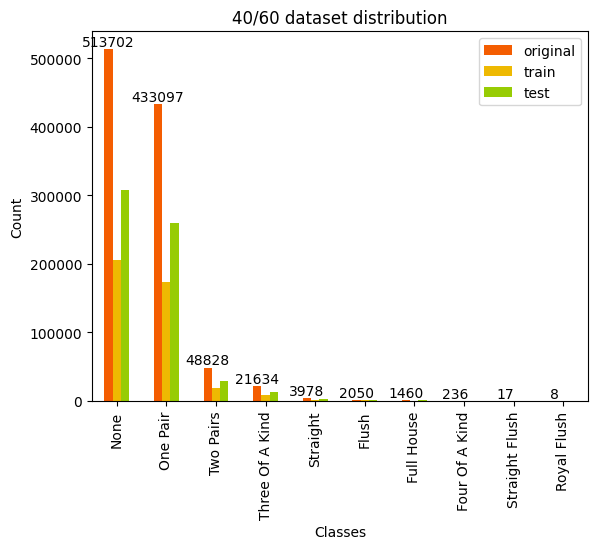

In [ ]:
draw_plot(label, subsets[0][2], subsets[0][3], '40/60 dataset distribution')

#### **The 60/40 dataset visualization**

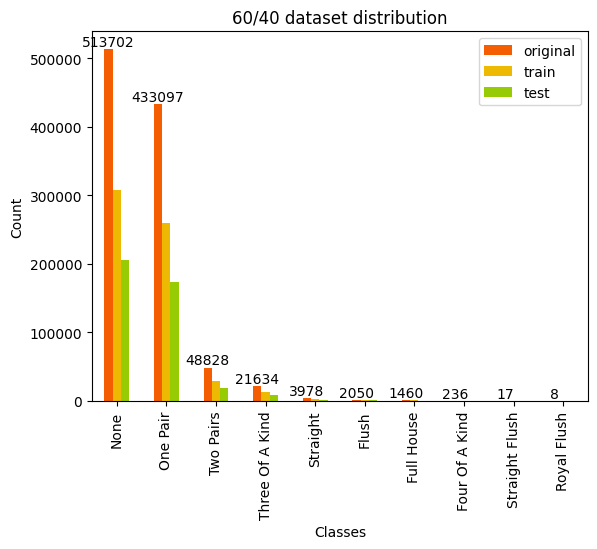

In [ ]:
draw_plot(label, subsets[1][2], subsets[1][3], '60/40 dataset distribution')

#### **The 80/20 dataset visualization**

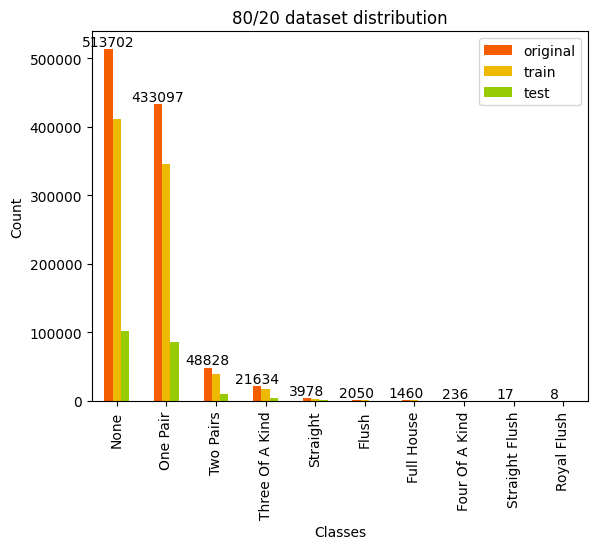

In [ ]:
draw_plot(label, subsets[2][2], subsets[2][3], '80/20 dataset distribution')

#### **The 90/10 dataset distribution**

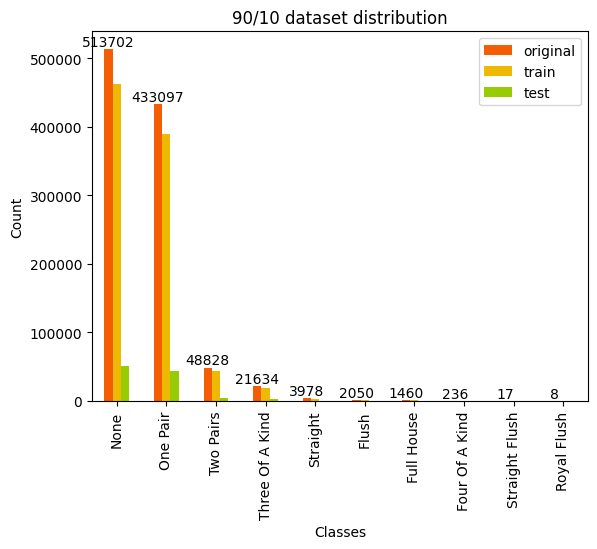

In [ ]:
draw_plot(label, subsets[3][2], subsets[3][3], '90/10 dataset distribution')

### **Building a decision tree classifiers**

In [ ]:
trees = [None] * 4

#### **The 40/60 set**

In [ ]:
feature_train, feature_test, label_train, label_test = subsets[0]
trees[0] = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0)
trees[0].fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', random_state=0)

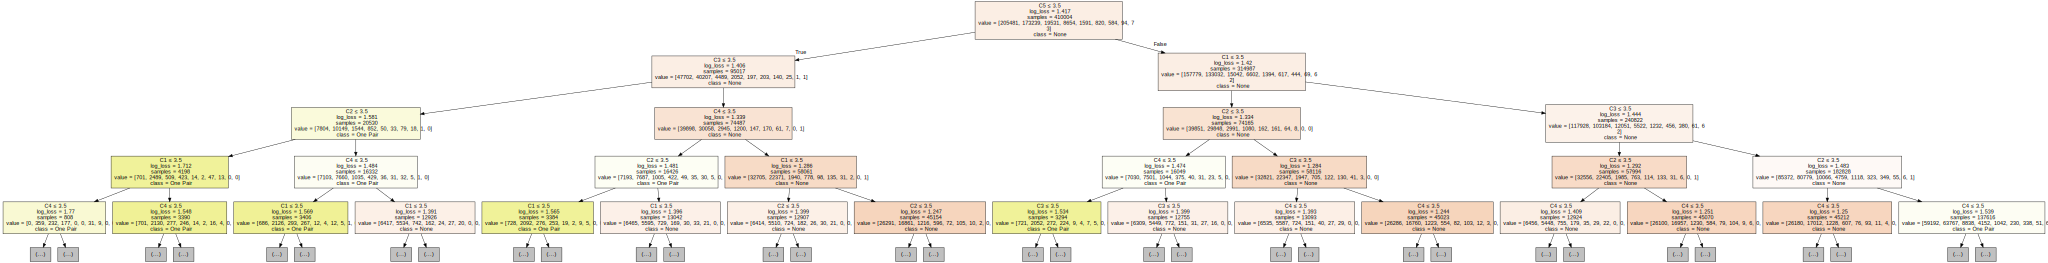

In [ ]:
data = tree.export_graphviz(trees[0], out_file = None, feature_names = feature_names, class_names = class_names, filled = True, max_depth = 4, special_characters = True)
graph = graphviz.Source(data)
graph

#### **The 60/40 set**

In [ ]:
feature_train, feature_test, label_train, label_test = subsets[1]
trees[1] = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0)
trees[1].fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', random_state=0)

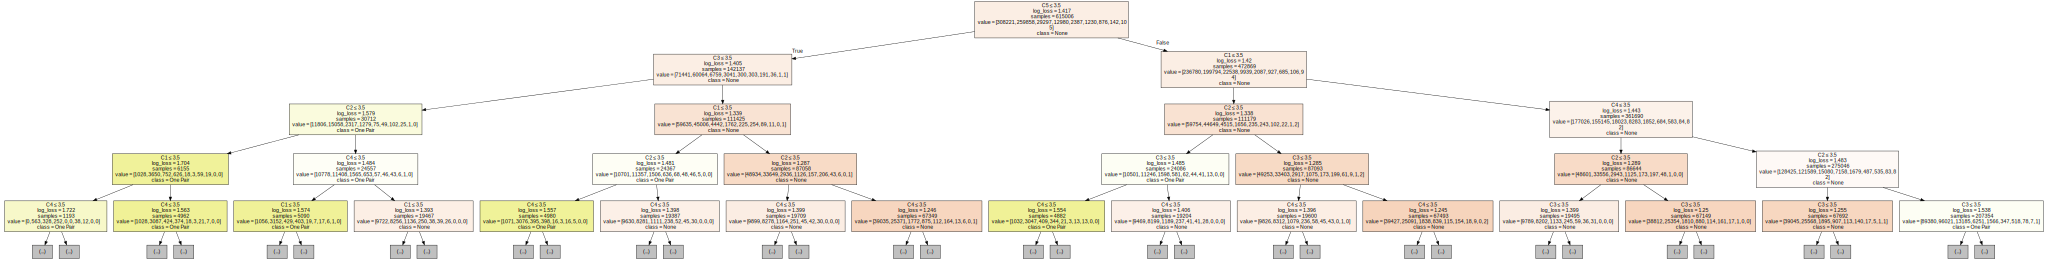

In [ ]:
data = tree.export_graphviz(trees[1], out_file = None, feature_names = feature_names, class_names = class_names, filled = True, max_depth = 4, special_characters = True)
graph = graphviz.Source(data)
graph

#### **The 80/20 set**

In [ ]:
feature_train, feature_test, label_train, label_test = subsets[2]
trees[2] = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0)
trees[2].fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', random_state=0)

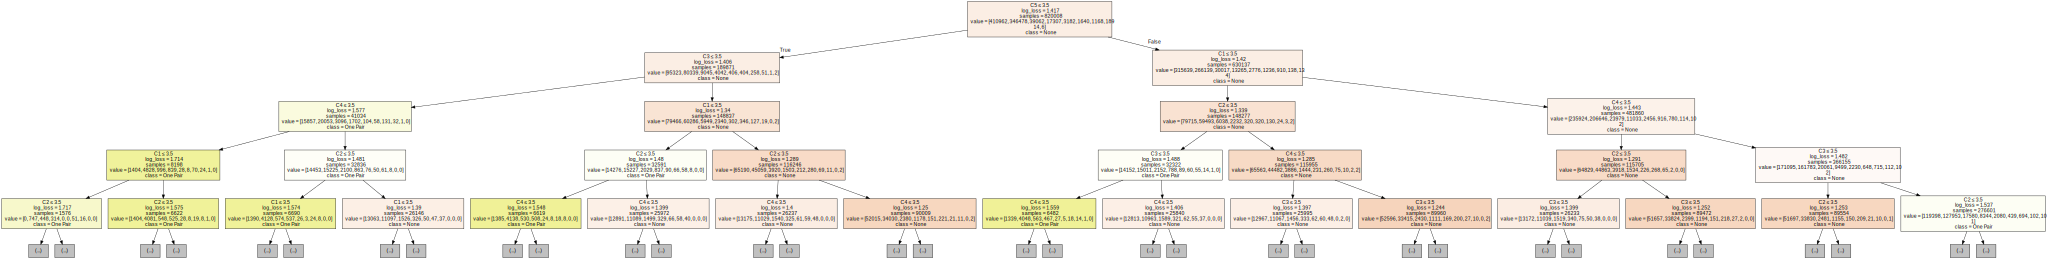

In [ ]:
data = tree.export_graphviz(trees[2], out_file = None, feature_names = feature_names, class_names = class_names, filled = True, max_depth = 4, special_characters = True)
graph = graphviz.Source(data)
graph

#### **The 90/10 set**

In [ ]:
feature_train, feature_test, label_train, label_test = subsets[3]
trees[3] = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0)
trees[3].fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', random_state=0)

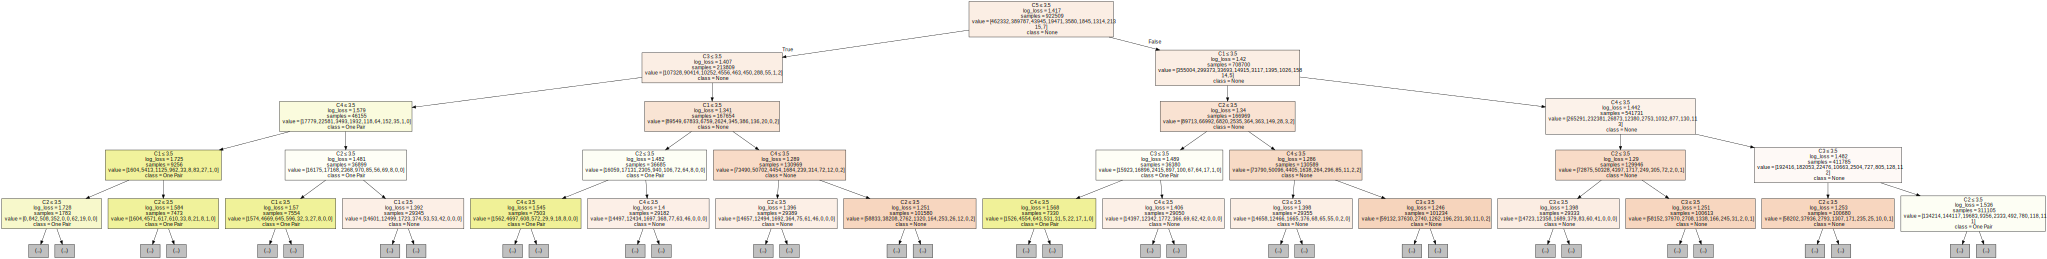

In [ ]:
data = tree.export_graphviz(trees[3], out_file = None, feature_names = feature_names, class_names = class_names, filled = True, max_depth = 4, special_characters = True)
graph = graphviz.Source(data)
graph

## **Evaluating the decision tree classifiers**

#### **The 40/60 set**

**Prediction**

In [ ]:
feature_test_40 = subsets[0][1]
label_test_40 = subsets[0][3]
label_pred_40 = trees[0].predict(feature_test_40)

**Report**

In [ ]:
print(classification_report(label_test_40, label_pred_40, target_names = class_names))

                 precision    recall  f1-score   support

           None       0.71      0.70      0.70    308221
       One Pair       0.58      0.58      0.58    259858
      Two Pairs       0.27      0.29      0.28     29297
Three Of A Kind       0.28      0.31      0.30     12980
       Straight       0.22      0.26      0.24      2387
          Flush       0.06      0.10      0.07      1230
     Full House       0.10      0.12      0.11       876
 Four Of A Kind       0.13      0.16      0.14       142
 Straight Flush       0.00      0.00      0.00        10
    Royal Flush       0.00      0.00      0.00         5

       accuracy                           0.62    615006
      macro avg       0.23      0.25      0.24    615006
   weighted avg       0.62      0.62      0.62    615006



**Confusion Matrix**

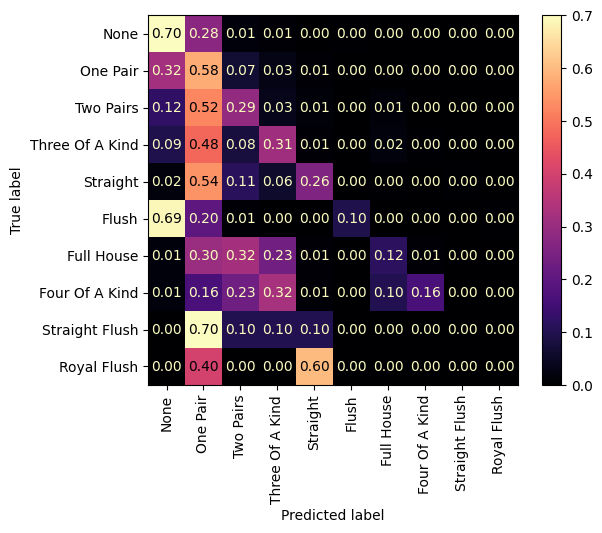

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(label_test_40, label_pred_40, display_labels = class_names, xticks_rotation = 'vertical', values_format = '.2f', normalize = 'true', cmap = 'magma')

#### **The 60/40 set**

**Predict**

In [ ]:
feature_test_60 = subsets[1][1]
label_test_60 = subsets[1][3]
label_pred_60 = trees[1].predict(feature_test_60)

**Report**

In [ ]:
print(classification_report(label_test_60, label_pred_60, target_names = class_names, zero_division = 0))

                 precision    recall  f1-score   support

           None       0.72      0.72      0.72    205481
       One Pair       0.60      0.60      0.60    173239
      Two Pairs       0.29      0.31      0.30     19531
Three Of A Kind       0.33      0.37      0.35      8654
       Straight       0.25      0.28      0.26      1591
          Flush       0.06      0.09      0.07       820
     Full House       0.11      0.14      0.13       584
 Four Of A Kind       0.15      0.16      0.16        94
 Straight Flush       0.00      0.00      0.00         7
    Royal Flush       0.00      0.00      0.00         3

       accuracy                           0.63    410004
      macro avg       0.25      0.27      0.26    410004
   weighted avg       0.64      0.63      0.64    410004



**Confusion Matrix**

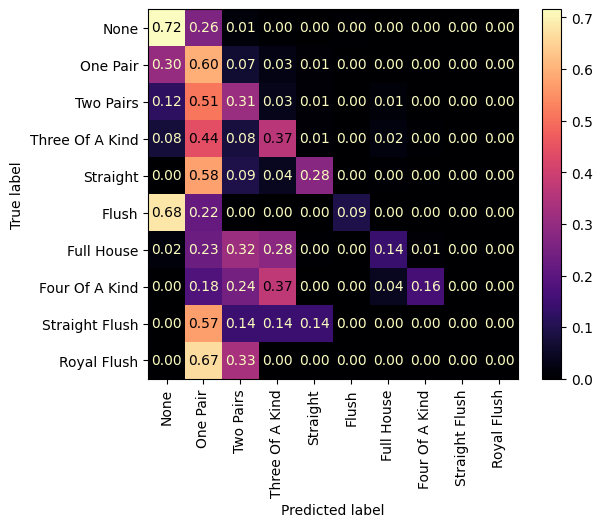

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(label_test_60, label_pred_60, display_labels = class_names, xticks_rotation = 'vertical', values_format = '.2f', normalize = 'true', cmap = 'magma')

#### **The 80/20 set**

**Predict**

In [ ]:
feature_test_80 = subsets[2][1]
label_test_80 = subsets[2][3]
label_pred_80 = trees[2].predict(feature_test_80)

**Report**

In [ ]:
print(classification_report(label_test_80, label_pred_80, target_names = class_names, zero_division = 0))

                 precision    recall  f1-score   support

           None       0.73      0.72      0.73    102740
       One Pair       0.61      0.61      0.61     86619
      Two Pairs       0.31      0.33      0.32      9766
Three Of A Kind       0.36      0.39      0.38      4327
       Straight       0.27      0.31      0.29       796
          Flush       0.08      0.11      0.09       410
     Full House       0.15      0.16      0.15       292
 Four Of A Kind       0.13      0.19      0.16        47
 Straight Flush       0.00      0.00      0.00         3
    Royal Flush       0.00      0.00      0.00         2

       accuracy                           0.65    205002
      macro avg       0.26      0.28      0.27    205002
   weighted avg       0.65      0.65      0.65    205002



**Confusing Matrix**

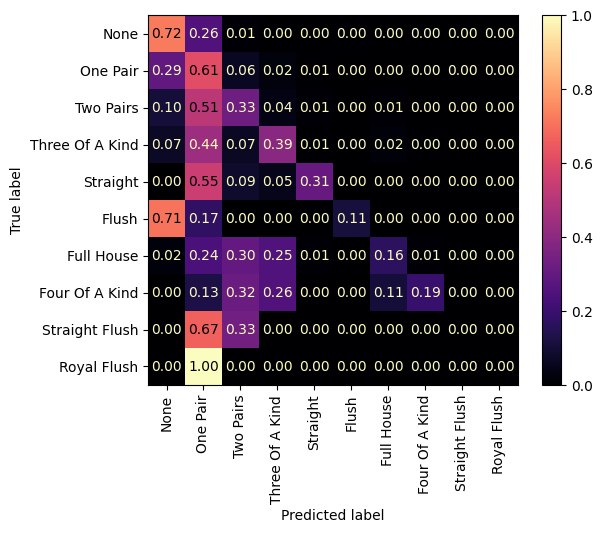

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(label_test_80, label_pred_80, display_labels = class_names, xticks_rotation = 'vertical', values_format = '.2f', normalize = 'true', cmap = 'magma')

#### **The 90/10 set**

**Predict**

In [ ]:
feature_test_90 = subsets[3][1]
label_test_90 = subsets[3][3]
label_pred_90 = trees[3].predict(feature_test_90)

**Report**

In [ ]:
print(classification_report(label_test_90, label_pred_90, target_names = class_names, zero_division = 0))

                 precision    recall  f1-score   support

           None       0.74      0.73      0.74     51370
       One Pair       0.62      0.62      0.62     43310
      Two Pairs       0.32      0.34      0.33      4883
Three Of A Kind       0.37      0.41      0.39      2163
       Straight       0.30      0.32      0.31       398
          Flush       0.07      0.11      0.09       205
     Full House       0.14      0.18      0.16       146
 Four Of A Kind       0.09      0.13      0.11        23
 Straight Flush       0.00      0.00      0.00         2
    Royal Flush       0.00      0.00      0.00         1

       accuracy                           0.66    102501
      macro avg       0.27      0.28      0.27    102501
   weighted avg       0.66      0.66      0.66    102501



**Confusing Matrix**

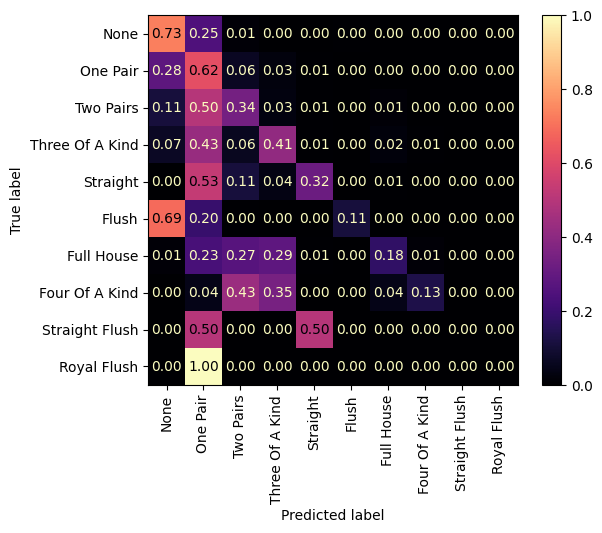

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(label_test_90, label_pred_90, display_labels = class_names, xticks_rotation = 'vertical', values_format = '.2f', normalize = 'true', cmap = 'magma')

## **The depth and accuracy of a decision tree** <br>
In this example we use the 80/20 dataset with max depth from None to 2, 3, 4, 5, 6 and 7

In [ ]:
feature_train, feature_test, label_train, label_test = subsets[2]

#### **Max depth = None**

In [ ]:
tree_depth_none = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0)
tree_depth_none.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', random_state=0)

**Decsion tree with max depth = None**

In [64]:
data = tree.export_graphviz(tree_depth_none, out_file = None, feature_names = feature_names, class_names=class_names, filled=True, max_depth = 10, special_characters = True)
graph = graphviz.Source(data)
graph

Output hidden; open in https://colab.research.google.com to view.

**Accuracy score**

In [ ]:
label_depth_none = tree_depth_none.predict(feature_test)
accuracy_score(label_test, label_depth_none)

0.6157354562394514

#### **Max depth = 2**

In [ ]:
tree_depth_2 = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0, max_depth = 2)
tree_depth_2.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', max_depth=2, random_state=0)

**Decision tree with max depth = 2**

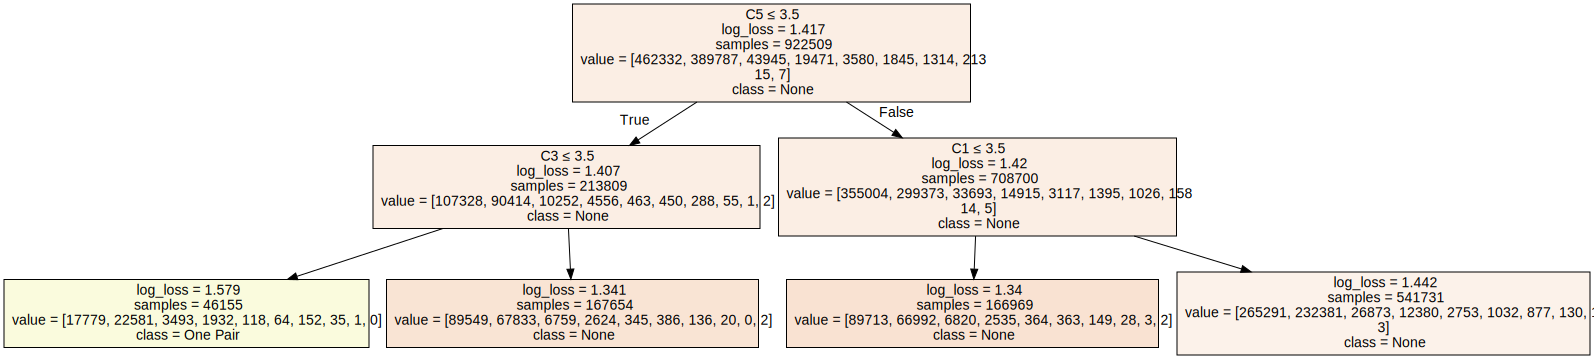

In [ ]:
data = tree.export_graphviz(tree_depth_2, out_file = None, feature_names = feature_names, class_names = class_names, filled = True, special_characters = True)
graph = graphviz.Source(data)
graph

**Accuracy score**

In [ ]:
label_depth_2 = tree_depth_2.predict(feature_test)
accuracy_score(label_test, label_depth_2)

0.5048340991795202

#### **Max depth = 3**

In [ ]:
tree_depth_3 = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0, max_depth = 3)
tree_depth_3.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', max_depth=3, random_state=0)

**Decision tree with max depth = 3**

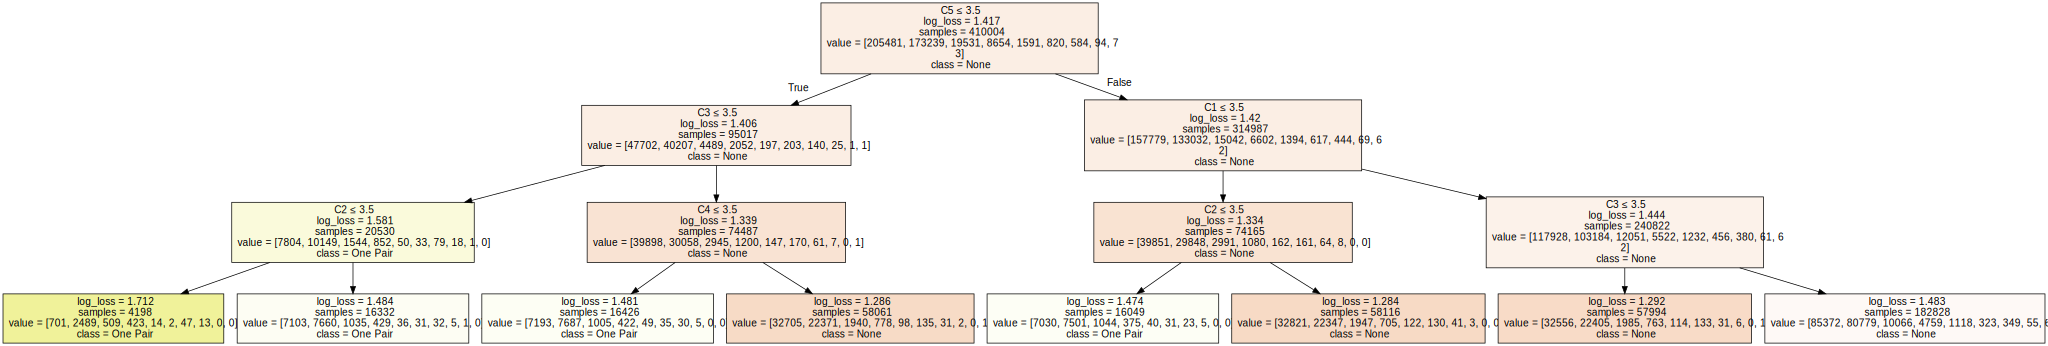

In [ ]:
data = tree.export_graphviz(tree_depth_3, out_file = None, feature_names = feature_names, class_names = class_names, filled = True, special_characters = True)
graph = graphviz.Source(data)
graph

In [ ]:
# Code to save the image
tree_data = export_graphviz(tree_depth_3, out_file=None, feature_names=feature_names) 
my_tree = graphviz.Source(tree_data, directory ='')
my_tree.save(filename='tree_depth_3.jpg', directory='/content/drive/MyDrive/21127296/SOURCE/Graph Image')
my_tree.render(filename='tree_depth_3',directory='/content/drive/MyDrive/21127296/SOURCE/Graph Image',view = True, format='jpg')

**Accuracy score**

In [ ]:
label_depth_3 = tree_depth_3.predict(feature_test)
accuracy_score(label_test, label_depth_3)

0.5074422038158978

#### **Max depth = 4**

In [ ]:
tree_depth_4 = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0, max_depth = 4)
tree_depth_4.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', max_depth=4, random_state=0)

**Decision tree with max depth = 4**

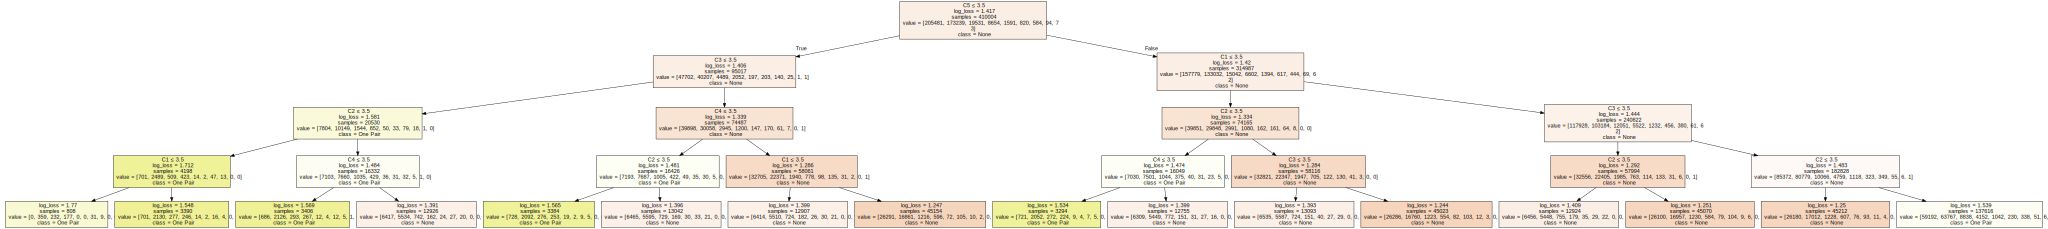

In [ ]:
data = tree.export_graphviz(tree_depth_4, out_file = None, feature_names = feature_names, class_names = class_names, filled = True, special_characters = True)
graph = graphviz.Source(data)
graph

In [ ]:
# Code to save the image
tree_data = export_graphviz(tree_depth_4, out_file=None, feature_names=feature_names) 
my_tree = graphviz.Source(tree_data, directory ='')
my_tree.save(filename='tree_depth_4.jpg', directory='/content/drive/MyDrive/21127296/SOURCE/Graph Image')
my_tree.render(filename='tree_depth_4',directory='/content/drive/MyDrive/21127296/SOURCE/Graph Image',view = True, format='jpg')

'/content/drive/MyDrive/21127296/SOURCE/Graph Image/tree_depth_4.jpg'

**Accuracy score**

In [ ]:
label_depth_4 = tree_depth_4.predict(feature_test)
accuracy_score(label_test, label_depth_4)

0.525186746145566

#### **Max depth = 5**

In [ ]:
tree_depth_5 = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0, max_depth = 5)
tree_depth_5.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', max_depth=5, random_state=0)

**Decision tree with max depth = 5**

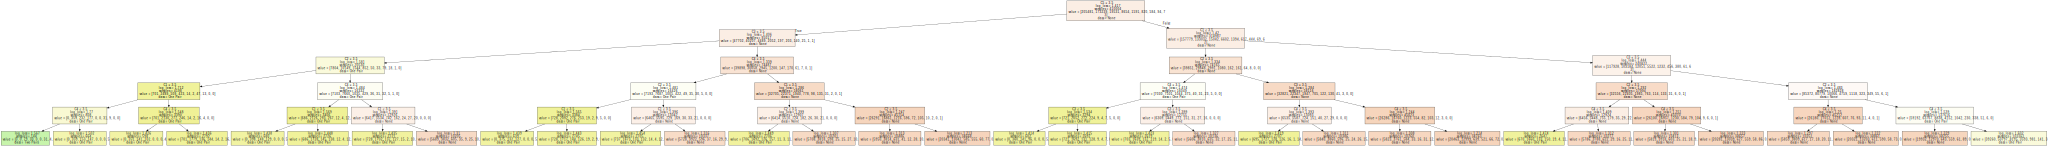

In [ ]:
data = tree.export_graphviz(tree_depth_5, out_file = None, feature_names = feature_names, class_names = class_names, filled = True, special_characters = True)
graph = graphviz.Source(data)
graph

In [ ]:
# Code to save the image
tree_data = export_graphviz(tree_depth_5, out_file=None, feature_names=feature_names) 
my_tree = graphviz.Source(tree_data, directory ='')
my_tree.save(filename='tree_depth_5.jpg', directory='/content/drive/MyDrive/21127296/SOURCE/Graph Image')
my_tree.render(filename='tree_depth_5',directory='/content/drive/MyDrive/21127296/SOURCE/Graph Image',view = True, format='jpg')

'/content/drive/MyDrive/21127296/SOURCE/Graph Image/tree_depth_5.jpg'

**Accuracy score**

In [ ]:
label_depth_5 = tree_depth_5.predict(feature_test)
accuracy_score(label_test, label_depth_5)

0.556931151891201

#### **Max depth = 6**

In [ ]:
tree_depth_6 = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0, max_depth = 6)
tree_depth_6.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', max_depth=6, random_state=0)

**Decision tree with max depth = 6**

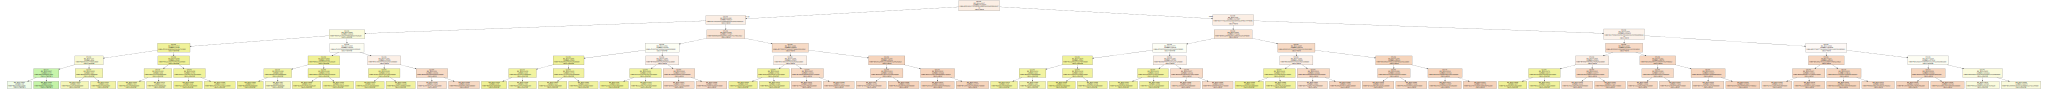

In [ ]:
data = tree.export_graphviz(tree_depth_6, out_file = None, feature_names = feature_names, class_names = class_names, filled = True, special_characters = True)
graph = graphviz.Source(data)
graph

In [ ]:
# Code to save the image
tree_data = export_graphviz(tree_depth_6, out_file=None, feature_names=feature_names) 
my_tree = graphviz.Source(tree_data, directory ='')
my_tree.save(filename='tree_depth_6.jpg', directory='/content/drive/MyDrive/21127296/SOURCE/Graph Image')
my_tree.render(filename='tree_depth_6',directory='/content/drive/MyDrive/21127296/SOURCE/Graph Image',view = True, format='jpg')

'/content/drive/MyDrive/21127296/SOURCE/Graph Image/tree_depth_6.jpg'

**Accuracy score**

In [ ]:
label_depth_6 = tree_depth_6.predict(feature_test)
accuracy_score(label_test, label_depth_6)

0.556931151891201

#### **Max depth = 7**

In [ ]:
tree_depth_7 = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0, max_depth = 7)
tree_depth_7.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', max_depth=7, random_state=0)

**Decision tree with max depth = 7**

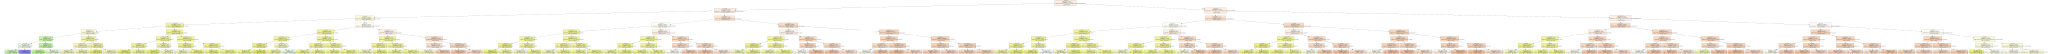

In [ ]:
data = tree.export_graphviz(tree_depth_7, out_file = None, feature_names = feature_names, class_names = class_names, filled = True, special_characters = True)
graph = graphviz.Source(data)
graph

In [ ]:
# Code to save the image
tree_data = export_graphviz(tree_depth_7, out_file=None, feature_names=feature_names) 
my_tree = graphviz.Source(tree_data, directory ='')
my_tree.save(filename='tree_depth_7.jpg', directory='/content/drive/MyDrive/21127296/SOURCE/Graph Image')
my_tree.render(filename='tree_depth_7',directory='/content/drive/MyDrive/21127296/SOURCE/Graph Image',view = True, format='jpg')

**Accuracy score**

In [ ]:
label_depth_7 = tree_depth_7.predict(feature_test)
accuracy_score(label_test, label_depth_7)

0.5574091960078438